In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Loading the Dataset

In [2]:
aviation_data = pd.read_csv("AviationData.csv", encoding = "latin1", low_memory=False)
aviation_data.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
us_codes = pd.read_csv("USState_Codes.csv")
us_codes.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Data Understanding

In [4]:
aviation_data.shape

(88889, 31)

In [5]:
us_codes.shape

(62, 2)

In [6]:
print(f"The Aviation dataset has {aviation_data.shape[0]} rows and {aviation_data.shape[1]} columns.")

The Aviation dataset has 88889 rows and 31 columns.


In [7]:
print(f"The US Codes dataset has {us_codes.shape[0]} rows and {us_codes.shape[1]} columns.")

The US Codes dataset has 62 rows and 2 columns.


In [8]:
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
us_codes.columns

Index(['US_State', 'Abbreviation'], dtype='object')

In [10]:
aviation_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
us_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [12]:
aviation_data.describe(include = 'all') 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10374,24870,...,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


In [13]:
us_codes.describe(include = 'all') 

,US_State,Abbreviation
count,62,62
unique,62,62
top,Alabama,AL
freq,1,1


# Handling Missing Values

In [14]:
# Finding missing values, that is getting a summary of missing data
aviation_data.isnull().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [15]:
# Checking the percentage of missing data per column to assess the 'emptiness' in each column. This was mainly done for easy interpretation of the data
round((aviation_data.isnull().mean() * 100), 2).sort_values(ascending=False)

Schedule                  85.85
Air.carrier               81.27
FAR.Description           63.97
Aircraft.Category         63.68
Longitude                 61.33
Latitude                  61.32
Airport.Code              43.60
Airport.Name              40.71
Broad.phase.of.flight     30.56
Publication.Date          15.49
Total.Serious.Injuries    14.07
Total.Minor.Injuries      13.42
Total.Fatal.Injuries      12.83
Engine.Type                7.98
Report.Status              7.18
Purpose.of.flight          6.97
Number.of.Engines          6.84
Total.Uninjured            6.65
Weather.Condition          5.05
Aircraft.damage            3.59
Registration.Number        1.55
Injury.Severity            1.12
Country                    0.25
Amateur.Built              0.11
Model                      0.10
Make                       0.07
Location                   0.06
Investigation.Type         0.00
Event.Date                 0.00
Accident.Number            0.00
Event.Id                   0.00
dtype: f

In [16]:
# Making a copy of the dataset before making alterations to the dataset
aviation = aviation_data.copy()
codes = us_codes.copy() 

In [17]:
## Next step involves inspecting the columns with above 40+% missing data
columns = ['Schedule', 'Air.carrier' ,'FAR.Description', 'Aircraft.Category', 'Longitude', 'Latitude', 'Airport.Code', 'Airport.Name']

for col in columns:
    print(f"Unique values in {col}:")
    print(aviation[col].unique())
    print()  # Empty line for readability

Unique values in Schedule:
[nan 'SCHD' 'NSCH' 'UNK']

Unique values in Air.carrier:
[nan 'Air Canada' 'Rocky Mountain Helicopters, In' ...
 'SKY WEST AVIATION INC TRUSTEE' 'GERBER RICHARD E' 'MC CESSNA 210N LLC']

Unique values in FAR.Description:
[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Armed Forces' 'Part 91 Subpart K: Fractional' '091' 'NUSC'
 '135' 'NUSN' '121' '137' '129' '133' '091K' 'UNK' 'PUBU' 'ARMF' '103'
 '125' '437' '107']

Unique values in Aircraft.Category:
[nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']

Unique values in Longitude:
[nan '-81.878056' '-70.758333' ... '1114

# Merging the Two Datasets

In [18]:
codes['US_State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'American Samoa', 'Guam', 'Marshall Islands', 'Micronesia',
       'Northern Marianas', 'Palau', 'Puerto Rico', 'Virgin Islands',
       'Washington_DC', 'Gulf of mexico', 'Atlantic ocean',
       'Pacific ocean'], dtype=object)

In [19]:
aviation['Location'].unique()

array(['MOOSE CREEK, ID', 'BRIDGEPORT, CA', 'Saltville, VA', ...,
       'San Manual, AZ', 'Auburn Hills, MI', 'Brasnorte, '],
      shape=(27759,), dtype=object)

In [20]:
# This code is meant to extract the 2 letter state abbreviations 
aviation['State_Codes'] = aviation['Location'].str.extract(r',\s*([A-Z]{2})$')[0]

In [21]:
# Checking for rows with a missing state
aviation['State_Codes'].isna().sum()

np.int64(6463)

In [22]:
# From my assessment, 6000+ missing columns will upset the data and I prefer not to merge them and will continue with the aviation data as is

# Assessing the data according to column

In [23]:
# From the above output I will begin by dropping the columns with 80+% missing data
aviation.drop(columns = ['Schedule'], inplace = True) 

In [24]:
# Rechecking if the column was dropped
aviation.shape

(88889, 31)

In [25]:
# Considering that the type of AirCarrier seems like important information, I will just fill the rest with unknown
aviation['Air.carrier'] = aviation['Air.carrier'].fillna('unknown')

In [26]:
# Rechecking if there is some missing data in the 'Air.carrier' column
aviation['Air.carrier'].unique()

array(['unknown', 'Air Canada', 'Rocky Mountain Helicopters, In', ...,
       'SKY WEST AVIATION INC TRUSTEE', 'GERBER RICHARD E',
       'MC CESSNA 210N LLC'], shape=(13590,), dtype=object)

In [27]:
aviation['Air.carrier'].isna().sum() 

np.int64(0)

In [28]:
# Checking the 'FAR.Description' column
aviation['FAR.Description'].unique()

array([nan, 'Part 129: Foreign', 'Part 91: General Aviation',
       'Part 135: Air Taxi & Commuter', 'Part 125: 20+ Pax,6000+ lbs',
       'Part 121: Air Carrier', 'Part 137: Agricultural',
       'Part 133: Rotorcraft Ext. Load', 'Unknown',
       'Part 91F: Special Flt Ops.', 'Non-U.S., Non-Commercial',
       'Public Aircraft', 'Non-U.S., Commercial', 'Public Use',
       'Armed Forces', 'Part 91 Subpart K: Fractional', '091', 'NUSC',
       '135', 'NUSN', '121', '137', '129', '133', '091K', 'UNK', 'PUBU',
       'ARMF', '103', '125', '437', '107'], dtype=object)

In [29]:
# checking for the number of null values in 'FAR.Description'
print(f"Number of missiing values in the column =  {aviation['FAR.Description'].isna().sum()}") 
print(f"The percentage of missing values in the column = {aviation['FAR.Description'].isna().sum() /len(aviation) * 100}")

Number of missiing values in the column =  56866
The percentage of missing values in the column = 63.97417003228746


In [30]:
# FAR description refers to a description of the federal aviation regulation since I'm not sure whether it is necessary, I will fill in the missing 
# data with unknown
aviation['FAR.Description'] = aviation['FAR.Description'].fillna('unknown') 

In [31]:
# confirming whether there are missing values in the column
aviation['FAR.Description'].isna().sum()

np.int64(0)

In [32]:
# From earlier analysis, 'Aircraft.Category' has 63% of the data missing since it seems important I will fill in the missing values with uknown
aviation['Aircraft.Category'] = aviation['Aircraft.Category'].fillna("unknown")

In [33]:
# Confirming whether it took
aviation['Aircraft.Category'].isna().sum()

np.int64(0)

In [34]:
# For 'Longitude' and 'Latitude' I will just fill uknown, still unsure whether it is important
aviation['Longitude'] = aviation['Longitude'].fillna('unknown')
aviation['Latitude'] = aviation['Latitude'].fillna('unknown') 

In [35]:
# Confirming whether they took
print(aviation['Longitude'].isna().sum())
print(aviation['Latitude'].isna().sum())

0
0


In [36]:
# 'Airport.Code' and 'Airport.Name' seem like important information, can't be filled using mean or mode, so uknown it is
aviation[['Airport.Code', 'Airport.Name']] = aviation[['Airport.Code', 'Airport.Name']].fillna('unknown')

In [37]:
# Confirming
aviation[['Airport.Code', 'Airport.Name']].isna().sum()

Airport.Code    0
Airport.Name    0
dtype: int64

In [38]:
# Broad.phase.of.flight and Publication.Date is vital information and have 30% and 15% of missing data respectively
aviation[['Broad.phase.of.flight', 'Publication.Date']] = aviation[['Broad.phase.of.flight', 'Publication.Date']].fillna('unknown')

In [39]:
# Confirming
aviation[['Broad.phase.of.flight', 'Publication.Date']].isna().sum()

Broad.phase.of.flight    0
Publication.Date         0
dtype: int64

In [40]:
# For these columns Total.Serious.Injuries, Total.Minor.Injuries, Total.Fatal.Injuries I think it is best to use the mean since they are numerical 
# and only have 14, 13, and 12 percent missing data and are numerical
the_three_columns = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries']
the_three_columns_means = aviation[the_three_columns].mean()

aviation.loc[:, the_three_columns] = aviation[the_three_columns].fillna(the_three_columns_means) 

In [41]:
# Confirming 
aviation[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries']].isna().sum()

Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Fatal.Injuries      0
dtype: int64

In [42]:
# Inspecting the 'Engine.Type' and 'Report.Status' columns
print(aviation['Engine.Type'].unique())

print(aviation['Report.Status'].unique())

['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']
['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot\x92s loss of control due to a wind gust during landing.']


In [43]:
# For the values in 'Engine.Type', I will fill that with 'Unknown' since there are values with uknown already
aviation['Engine.Type'] = aviation['Engine.Type'].fillna('Uknown')

In [44]:
# For, the values in 'Report.Status', that will be filled using mode
Report_Status_mode = aviation['Report.Status'].mode()[0]
aviation['Report.Status'] = aviation['Report.Status'].fillna(Report_Status_mode) 

In [45]:
# Confirming
aviation[['Engine.Type','Report.Status']].isna().sum()

Engine.Type      0
Report.Status    0
dtype: int64

In [46]:
# These columns have a missing value count of 6%+, I chose to inspect them together
aviation[['Purpose.of.flight','Number.of.Engines','Total.Uninjured']].dtypes 

Purpose.of.flight     object
Number.of.Engines    float64
Total.Uninjured      float64
dtype: object

In [47]:
# Since 'Purpose.of.flight' has an object output, then I will have to go assess the column closely
aviation['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [48]:
# Since there are unknown columns in the dataset, will just fill in the same
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].fillna('Unknown') 

In [49]:
# Confirming
aviation['Purpose.of.flight'].isna().sum() 

np.int64(0)

In [50]:
# for the 'Number.of.Engines' and 'Total.Uninjured' columns, I will use mean to fill these in
six_percent_columns = ['Number.of.Engines','Total.Uninjured']
six_percent_means = aviation[six_percent_columns].mean()
aviation[six_percent_columns] = aviation[six_percent_columns].fillna(six_percent_means) 

In [51]:
# Confirming
aviation[['Number.of.Engines','Total.Uninjured']].isna().sum()

Number.of.Engines    0
Total.Uninjured      0
dtype: int64

In [52]:
# Checking the data types for 'Weather.Condition', 'Aircraft.damage', 'Registration.Number' and 'Injury.Severity'
aviation[['Weather.Condition', 'Aircraft.damage', 'Registration.Number','Injury.Severity']].dtypes

Weather.Condition      object
Aircraft.damage        object
Registration.Number    object
Injury.Severity        object
dtype: object

In [53]:
# Since they are objects, a deeper analysis is necessary for each one of them
the_four_columns = ['Weather.Condition', 'Aircraft.damage', 'Registration.Number','Injury.Severity']

for col in the_four_columns:
    print(aviation[col].unique())
    print()

['UNK' 'IMC' 'VMC' nan 'Unk']

['Destroyed' 'Substantial' 'Minor' nan 'Unknown']

['NC6404' 'N5069P' 'N5142R' ... 'N749PJ' 'N210CU' 'N9026P']

['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)' 'Fatal(110)' 'Fatal(230)' 'Fatal(97)'
 'Fatal(349)' 'Fatal(125)' 'Fatal(35)' 'Fatal(228)' 'Fatal(75)'
 'Fatal(104)' 'Fatal(229)' 'Fatal(80)' 'Fat

In [54]:
# For 'Weather.Condition', this I will fill using the mode
Weather_Condition_mode = aviation['Weather.Condition'].mode()[0]
aviation['Weather.Condition'] = aviation['Weather.Condition'].fillna(Weather_Condition_mode)


In [55]:
# Confirming
aviation['Weather.Condition'].isna().sum() 

np.int64(0)

In [56]:
# for the 'Aircraft.damage' column, since there are Unknown values, I all add the missing to them
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].fillna('Unknown') 

In [57]:
# Confirming
aviation['Aircraft.damage'].isna().sum() 

np.int64(0)

In [58]:
# in column, 'Registration.Number' I will use mode to fill in the missing data
Registration_Number_mode = aviation['Registration.Number'].mode()[0]
aviation['Registration.Number'] = aviation['Registration.Number'].fillna(Registration_Number_mode)

In [59]:
# Confirming
aviation['Registration.Number'].isna().sum() 

np.int64(0)

In [60]:
# Checking the data types for, Country, Amateur.Built, Model, Make and Location 
aviation[['Country', 'Amateur.Built', 'Model', 'Make', 'Location']].dtypes

Country          object
Amateur.Built    object
Model            object
Make             object
Location         object
dtype: object

In [61]:
# checking the unique values
final_columns = ['Country', 'Amateur.Built', 'Model', 'Make', 'Location']
for col in final_columns:
    print(aviation[col].unique())
    print()

['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands'
 'Northern Mariana Islands' 'Dominican Republic' 'Suriname' 'Honduras'
 'Congo' 'Belize' 'Guatemala' 'Anguilla' 'France'
 'St Vincent And The Grenadines' 'Haiti' 'Montserrat' 'Papua New Guinea'
 'Cayman Islands' 'Sweden' 'Taiwan' 'Senegal' 'Barbados' 'BLOCK 651A'
 'Brazil' 'Mauritius' 'Argentina' 'Kenya' 'Ecuador' 'Aruba' 'Saudi Arabia'
 'Cuba' 'Italy' 'French Guiana' 'Denmark' 'Sudan' 'Spai

In [62]:
# Since there are Uknown values in the Country column, I will just include the missing data to these
aviation['Country'] = aviation['Country'].fillna('Uknown')

In [63]:
# Confirming
aviation['Country'].isna().sum()

np.int64(0)

In [64]:
# Since there are three unique entries, for the Amateur.Built column, I will use mode to fill these in. The same applies for Model.
for col in ['Amateur.Built', 'Model', 'Make', 'Location']:
    mode_value = aviation[col].mode()[0]
    aviation[col]= aviation[col].fillna(mode_value)


In [65]:
# confirming 
print(aviation['Amateur.Built'].unique())
print(aviation['Model'].unique())
print(aviation['Make'].unique())
print(aviation['Location'].unique())

['No' 'Yes']
['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']


In [66]:
# Rechecking and confirming that the dataset does not have null values
aviation.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                     0
Longitude                    0
Airport.Code                 0
Airport.Name                 0
Injury.Severity           1000
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
FAR.Description              0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
State_Codes               6463
dtype: int64

In [67]:
aviation['Injury.Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [68]:
# Fill in the missing data using mode
injury_mode = aviation['Injury.Severity'].mode()[0]
aviation['Injury.Severity'] = aviation['Injury.Severity'].fillna(injury_mode)

In [69]:
aviation['Injury.Severity'].isna().sum()

np.int64(0)

In [70]:
# Checking if there are any duplicates in the dataset
aviation.duplicated().any()

np.False_

# Standardizing and Formating the Data

In [71]:
# Standardizing the c
aviation.columns = (
    aviation.columns
    .str.strip()       
    .str.title() 
    .str.replace('.', '_')  
)


In [72]:
aviation.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date', 'State_Codes'],
      dtype='object')

In [73]:
# Coverting the datatypes starting with the time_based formats
aviation['Event_Id'] = pd.to_datetime(aviation['Event_Id'], errors='coerce')
aviation['Publication_Date'] = pd.to_datetime(aviation['Publication_Date'], errors='coerce')

C:\Users\Owner\AppData\Local\Temp\ipykernel_808\893748704.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation['Event_Id'] = pd.to_datetime(aviation['Event_Id'], errors='coerce')
C:\Users\Owner\AppData\Local\Temp\ipykernel_808\893748704.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aviation['Publication_Date'] = pd.to_datetime(aviation['Publication_Date'], errors='coerce')


In [74]:
# Confirming whether the changes took
aviation[['Event_Id','Publication_Date']].dtypes

Event_Id            datetime64[ns]
Publication_Date    datetime64[ns]
dtype: object

In [75]:
# Changing the corrdinates to numeric
aviation['Latitude'] = pd.to_numeric(aviation['Latitude'], errors = 'coerce')
aviation['Longitude'] = pd.to_numeric(aviation['Longitude'], errors = 'coerce')

In [76]:
# Confirming
aviation[['Latitude','Longitude']].dtypes

Latitude     float64
Longitude    float64
dtype: object

In [77]:
# changing all the columns containing injuries
injury_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Number_Of_Engines']
for col in injury_columns:
    aviation[col] = pd.to_numeric(aviation[col], errors = 'coerce')

In [78]:
# Confirming
aviation[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Number_Of_Engines']].dtypes

Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Number_Of_Engines         float64
dtype: object

In [79]:
# Reaffarming the categorical columns
categorical_columns = ['Investigation_Type','Injury_Severity','Aircraft_Damage','Aircraft_Category','Amateur_Built','Engine_Type','Far_Description', 
                       'Purpose_Of_Flight','Air_Carrier','Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status']
for cols in categorical_columns:
    aviation[cols] = aviation[col].astype('category')

In [80]:
# Confirming
aviation[['Investigation_Type','Injury_Severity','Aircraft_Damage','Aircraft_Category','Amateur_Built','Engine_Type','Far_Description', 
                       'Purpose_Of_Flight','Air_Carrier','Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status']].dtypes

Investigation_Type       category
Injury_Severity          category
Aircraft_Damage          category
Aircraft_Category        category
Amateur_Built            category
Engine_Type              category
Far_Description          category
Purpose_Of_Flight        category
Air_Carrier              category
Weather_Condition        category
Broad_Phase_Of_Flight    category
Report_Status            category
dtype: object

In [81]:
# Standardizing the Make column
aviation['Make'] = aviation['Make'].str.strip().str.title()

In [82]:
# Export the cleaned dataset
aviation.to_csv('Aviation_Cleaned.csv', index=False) 

# The Start of Exploratory Data Analysis

In [83]:
# The start of trying to understand the data
aviation.shape

(88889, 31)

In [84]:
print(f"The data has {aviation.shape[0]} rows, and {aviation.shape[1]} columns.")

The data has 88889 rows, and 31 columns.


In [85]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                1894 non-null   datetime64[ns]
 1   Investigation_Type      88889 non-null  category      
 2   Accident_Number         88889 non-null  object        
 3   Event_Date              88889 non-null  object        
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport_Code            88889 non-null  object        
 9   Airport_Name            88889 non-null  object        
 10  Injury_Severity         88889 non-null  category      
 11  Aircraft_Damage         88889 non-null  category      
 12  Aircraft_Category       88889 non-null  catego

In [86]:
aviation.describe(include='all')

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_Carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,State_Codes
count,1894,88889.0,88889,88889,88889,88889,1.198600e+04,1.197400e+04,88889,88889,...,88889.0,88889.000000,88889.000000,88889.000000,88889.000000,88889.0,88889.0,88889.0,75118,82426
unique,NaN,8.0,88863,14782,27758,220,NaN,NaN,10375,24871,...,8.0,NaN,NaN,NaN,NaN,8.0,8.0,8.0,NaN,61
top,NaN,1.0,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,NaN,NaN,unknown,unknown,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,CA
freq,NaN,69582.0,2,25,486,82248,NaN,NaN,38757,36185,...,69582.0,NaN,NaN,NaN,NaN,69582.0,69582.0,69582.0,NaN,8857
mean,2021-10-19 20:10:44.290390528,NaN,NaN,NaN,NaN,NaN,3.994505e+03,4.645638e+04,NaN,NaN,...,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,2004-08-29 11:36:45.969275008,NaN
min,2020-09-28 10:20:38,NaN,NaN,NaN,NaN,NaN,-7.801695e+01,-1.742967e+02,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1980-04-16 00:00:00,NaN
25%,2021-05-05 16:30:37.500000,NaN,NaN,NaN,NaN,NaN,3.344222e+01,-1.162256e+02,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1993-09-29 00:00:00,NaN
50%,2021-10-04 10:40:35.500000,NaN,NaN,NaN,NaN,NaN,3.816736e+01,-9.547861e+01,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,2002-02-20 00:00:00,NaN
75%,2022-05-03 10:50:33.750000128,NaN,NaN,NaN,NaN,NaN,4.256153e+01,-8.201972e+01,NaN,NaN,...,NaN,0.647855,0.279881,0.357061,2.000000,NaN,NaN,NaN,2020-09-25 00:00:00,NaN
max,2022-09-19 10:59:59,NaN,NaN,NaN,NaN,NaN,7.302524e+06,5.965231e+07,NaN,NaN,...,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,2022-12-30 00:00:00,NaN


# Univariate Analysis 

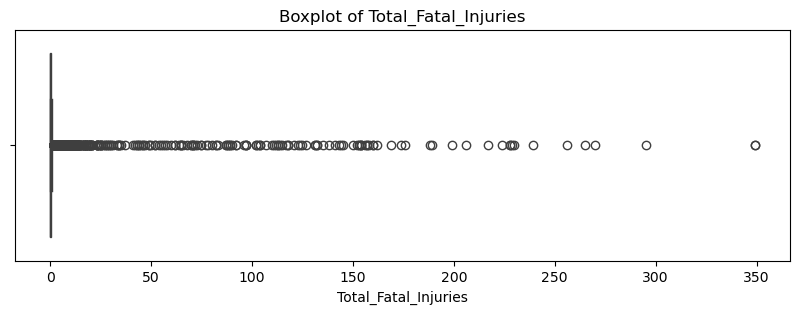

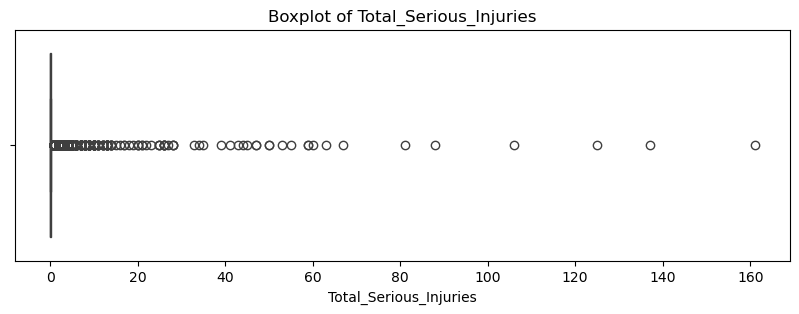

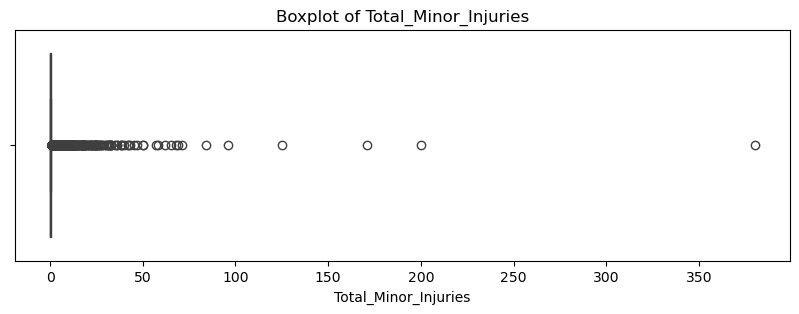

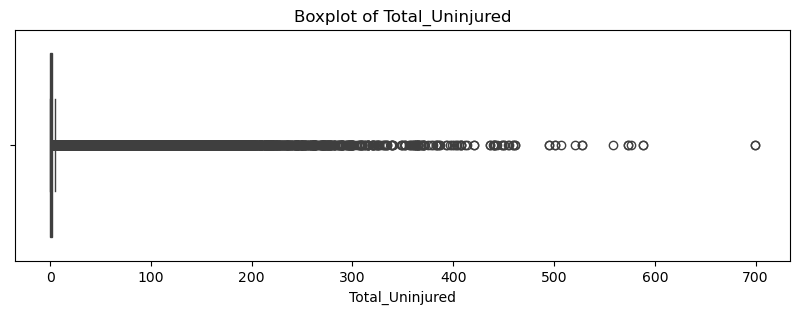

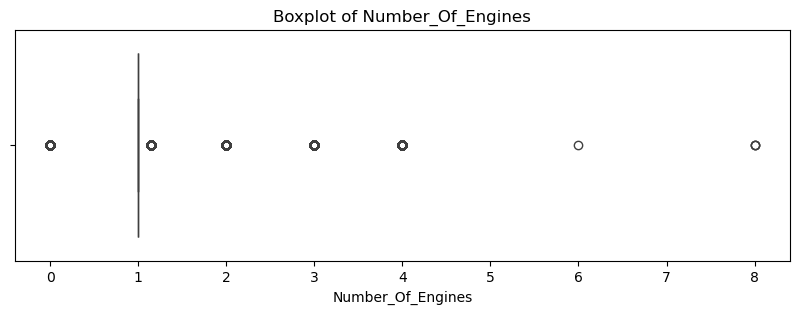

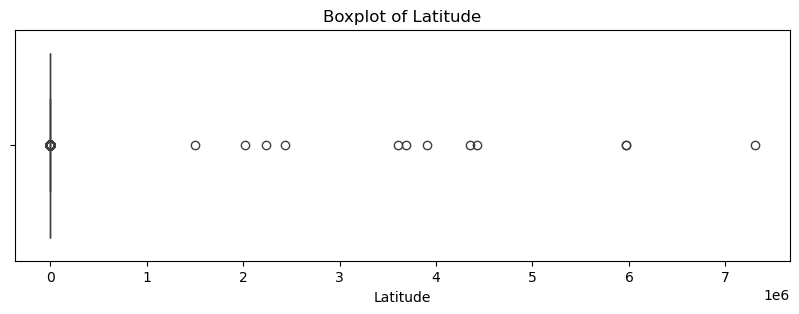

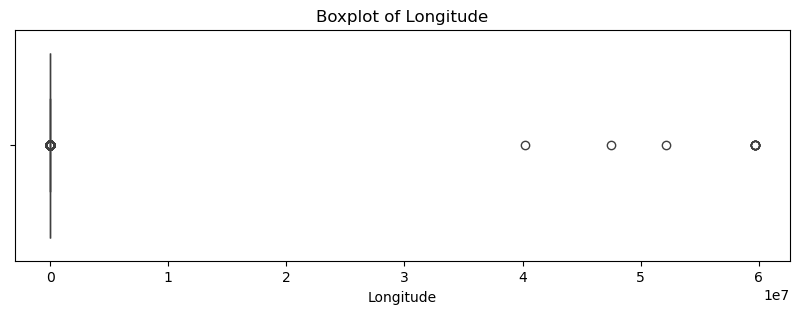

In [87]:
# Considering that 30 columns are more than plenty, I will start with removing outliers in the columns that seem important first
essential_columns = ['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries','Total_Uninjured','Number_Of_Engines','Latitude',
                     'Longitude']
for col in essential_columns:
    plt.figure(figsize = (10,3))
    sns.boxplot(x=aviation[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [88]:
# From the above, it is clear that there are some outliers, but considering that the dataset concerns fatalities, I won't be removing any.

In [89]:
# The Start of Plotting

In [90]:
# After plotting the following four lines of code were added later, they are meant to deal with the 'Injury_Severity column'
print(aviation['Injury_Severity'].unique())

[1.000000, 1.146585, 2.000000, 0.000000, 3.000000, 4.000000, 8.000000, 6.000000]
Categories (8, float64): [0.000000, 1.000000, 1.146585, 2.000000, 3.000000, 4.000000, 6.000000, 8.000000]


In [91]:
print(aviation['Injury_Severity'].dtype) 
print(aviation['Aircraft_Damage'].dtype)

category
category


In [92]:
aviation['Injury_Severity'] = aviation['Injury_Severity'].astype(float)
aviation['Aircraft_Damage'] = aviation['Aircraft_Damage'].astype(float)

In [93]:
aviation['Injury_Severity'] = aviation['Injury_Severity'].round(2)
aviation['Aircraft_Damage'] = aviation['Aircraft_Damage'].round(2)
print(aviation['Injury_Severity'].unique())
print(aviation['Aircraft_Damage'].unique())

[1.   1.15 2.   0.   3.   4.   8.   6.  ]
[1.   1.15 2.   0.   3.   4.   8.   6.  ]


In [94]:
# From below we have the plots

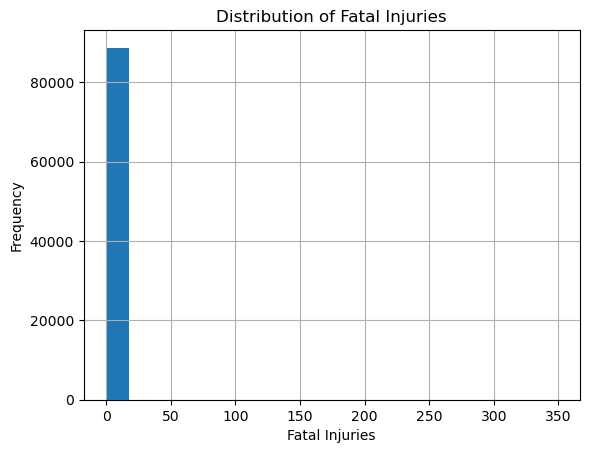

In [95]:
aviation['Total_Fatal_Injuries'].hist(bins=20)
plt.title('Distribution of Fatal Injuries')
plt.xlabel('Fatal Injuries')
plt.ylabel('Frequency')
plt.show()

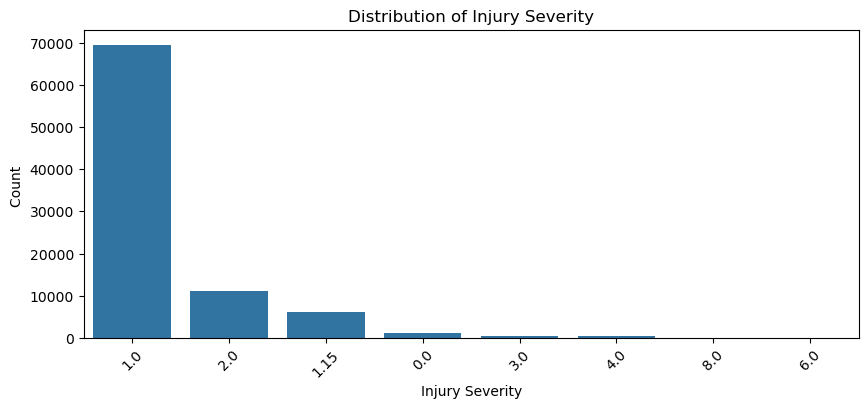

In [96]:
# Plotting Injury Severity
plt.figure(figsize=(10,4))
sns.countplot(data=aviation, x='Injury_Severity', order=aviation['Injury_Severity'].value_counts().index)
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count ')
plt.xticks(rotation=45)
plt.show()

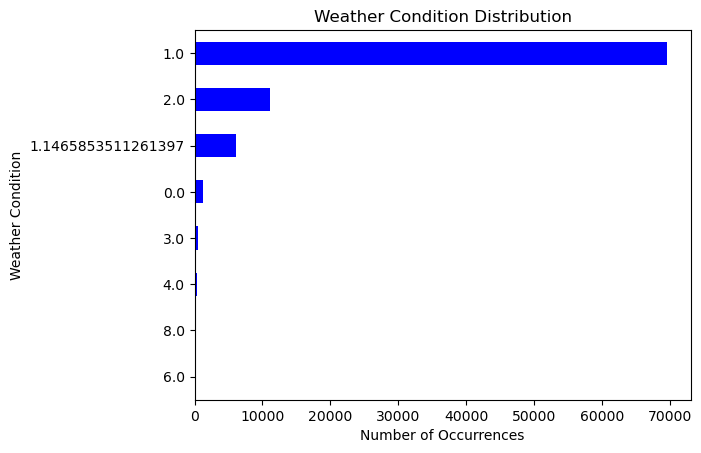

In [97]:
# Assessing teh weather condition column
aviation['Weather_Condition'].value_counts().sort_values().plot(kind='barh', color='blue')
plt.title('Weather Condition Distribution')
plt.xlabel('Number of Occurrences')
plt.ylabel('Weather Condition')
plt.show()

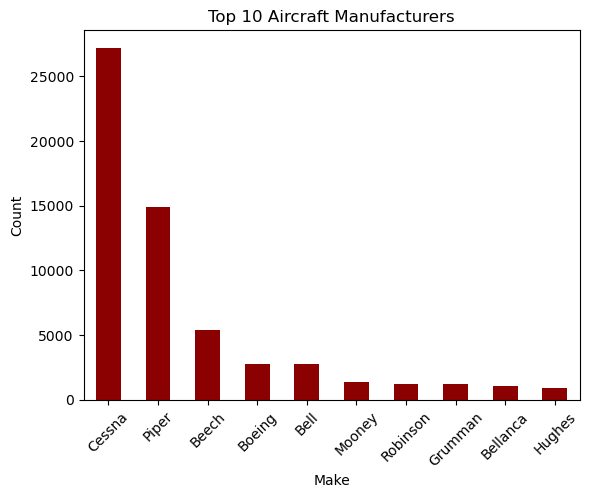

In [98]:
# To get an idea of the top 10 airplane makes in the dataset
aviation['Make'].value_counts().nlargest(10).plot(kind='bar', color='darkred')
plt.title('Top 10 Aircraft Manufacturers')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

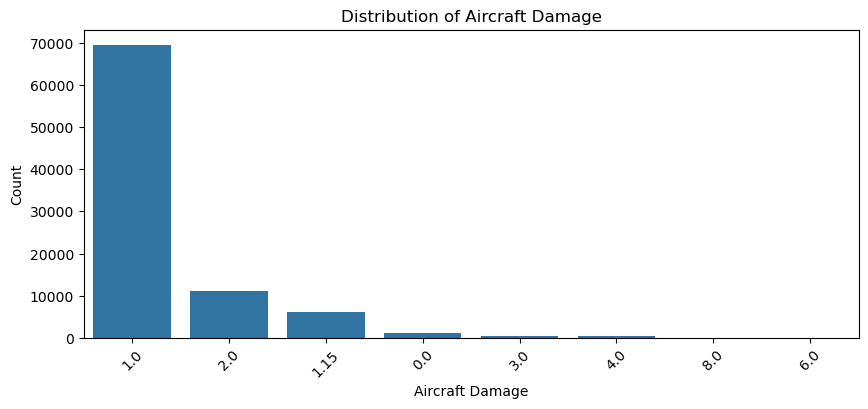

In [99]:
# Plotting Aircraft Damage
plt.figure(figsize=(10,4))
sns.countplot(data=aviation, x='Aircraft_Damage', order=aviation['Aircraft_Damage'].value_counts().index)
plt.title('Distribution of Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [100]:
# I would have wanted to represent the graps for weather condition, and broad phase of flight, but these will have the same visualization
# as the last two

In [101]:
# Bivariate Analysis

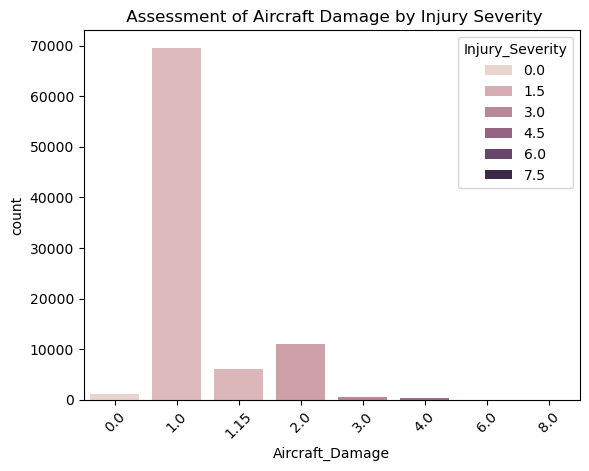

In [102]:
# Assessing aircraft damage alongside injury severity
# My thought process is that it will show how damages will relate to injury level
sns.countplot(data=aviation, x='Aircraft_Damage', hue='Injury_Severity')
plt.title(' Assessment of Aircraft Damage by Injury Severity')
plt.xticks(rotation=45)
plt.show()

In [103]:
aviation['Weather_Condition'] = aviation['Weather_Condition'].astype(float)
aviation['Weather_Condition'] = aviation['Weather_Condition'].round(2)

In [104]:
aviation['Broad_Phase_Of_Flight'] = aviation['Broad_Phase_Of_Flight'].astype(float)
aviation['Broad_Phase_Of_Flight'] = aviation['Broad_Phase_Of_Flight'].round(2)

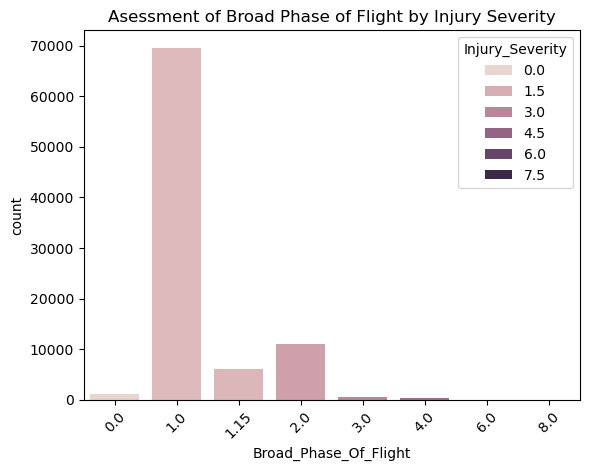

In [105]:
# Assessing weather condition alongside injury severity
# Considering the existing flight phases that can be considered to be riskier
sns.countplot(data=aviation, x='Broad_Phase_Of_Flight', hue='Injury_Severity')
plt.title('Asessment of Broad Phase of Flight by Injury Severity')
plt.xticks(rotation=45)
plt.show()

In [106]:
aviation['Purpose_Of_Flight'] = aviation['Purpose_Of_Flight'].astype(float)
aviation['Purpose_Of_Flight'] = aviation['Purpose_Of_Flight'].round(2)

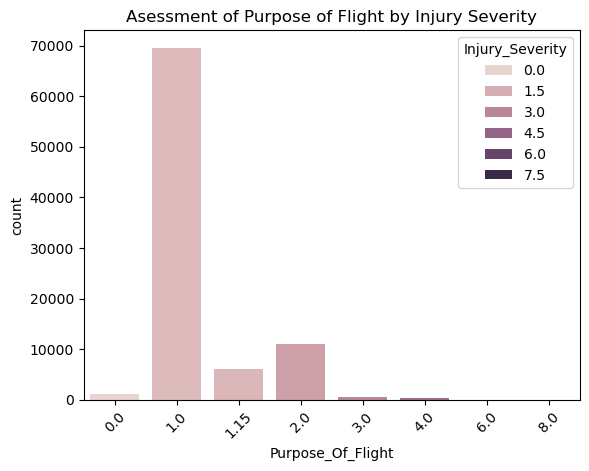

In [107]:
# Assessing purpose of flight alongside injury severity
# Based on the assumption that training flights can be more dangerous
sns.countplot(data=aviation, x='Purpose_Of_Flight', hue='Injury_Severity')
plt.title('Asessment of Purpose of Flight by Injury Severity')
plt.xticks(rotation=45)
plt.show()

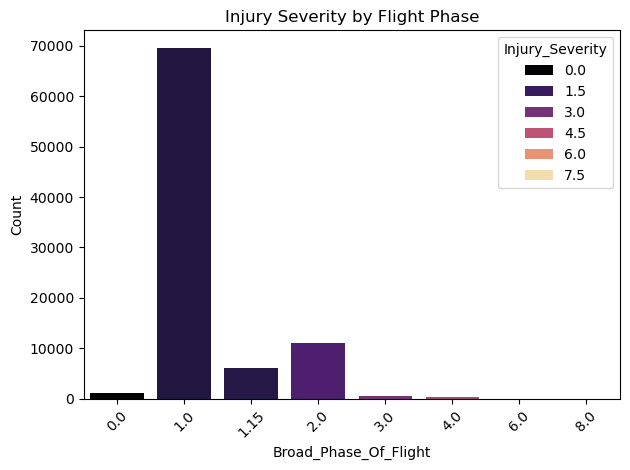

In [108]:
data = aviation.groupby(['Broad_Phase_Of_Flight', 'Injury_Severity']).size().reset_index(name='Count')

# Plot
sns.barplot(data=data, x='Broad_Phase_Of_Flight', y='Count', hue='Injury_Severity', palette='magma')
plt.title('Injury Severity by Flight Phase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [109]:
# Assessing categorical and numerical data

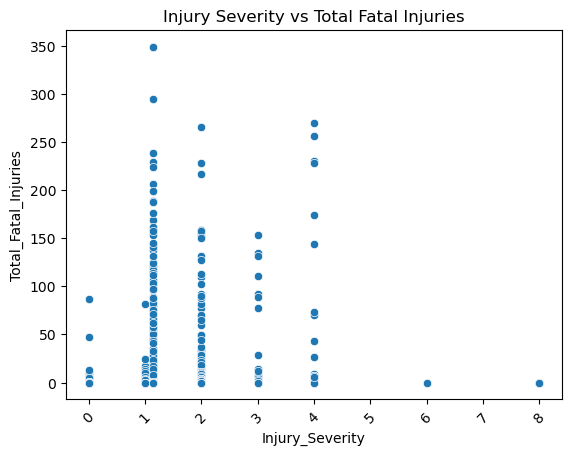

In [110]:
# Assessments of injury severity and total fatal injuries 
# Considers the severity that has high fatalities
sns.scatterplot(data=aviation, x='Injury_Severity', y='Total_Fatal_Injuries')
plt.title('Injury Severity vs Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

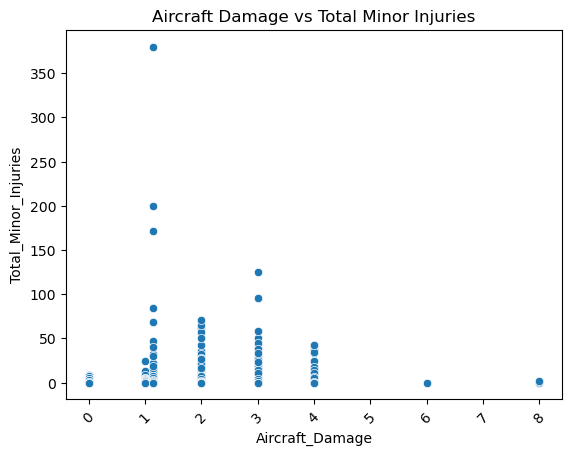

In [111]:
# Assessment of aircraft damage and total minor injuries
# Considering the injuries per damage type
sns.scatterplot(data=aviation, x='Aircraft_Damage', y='Total_Minor_Injuries')
plt.title('Aircraft Damage vs Total Minor Injuries')
plt.xticks(rotation=45)
plt.show()

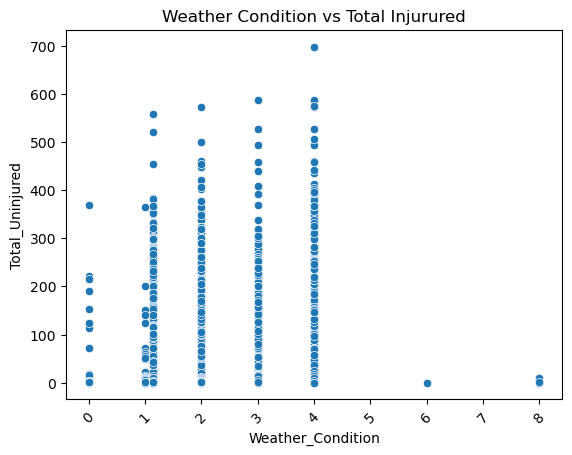

In [112]:
# Assessment of weather condition and total uninjured
# Considering the difference in survivors by considering the weather
sns.scatterplot(data=aviation, x='Weather_Condition', y='Total_Uninjured')
plt.title('Weather Condition vs Total Injurured')
plt.xticks(rotation=45)
plt.show()

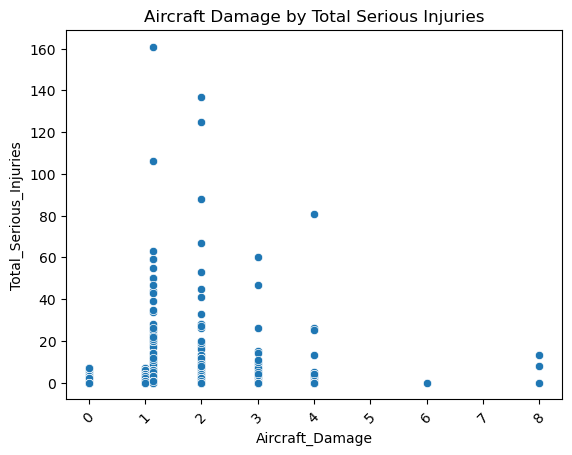

In [113]:
# Assessments of aircraft damage and total serious injures
# The consideration is the relativity of aircraft damage to total serious injuries
sns.scatterplot(data=aviation, x='Aircraft_Damage', y='Total_Serious_Injuries')
plt.title('Aircraft Damage by Total Serious Injuries')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Considering numeric versus numeric data

In [115]:
aviation['Number_Of_Engines'] = aviation['Number_Of_Engines'].astype(float)
aviation['Number_Of_Engines'] = aviation['Number_Of_Engines'].round(2)

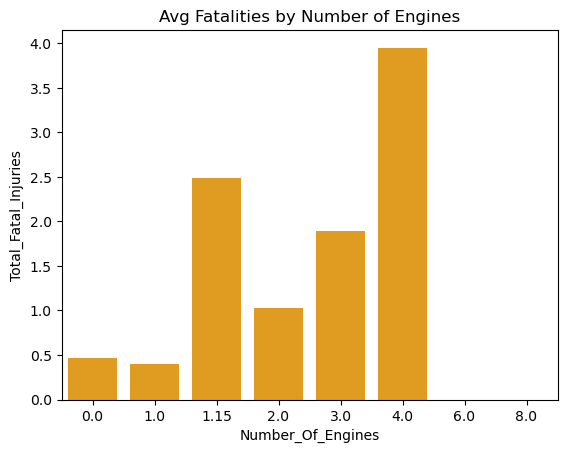

In [116]:
# Assessment of number of engines to total fatalities 
# The idea is to consider the weight of the aircraft to fatalities since more engines translates to a bigger airplane
sns.barplot(data=aviation, x='Number_Of_Engines', y='Total_Fatal_Injuries', color='orange', estimator=np.mean, errorbar=None)
plt.title("Avg Fatalities by Number of Engines")
plt.show()

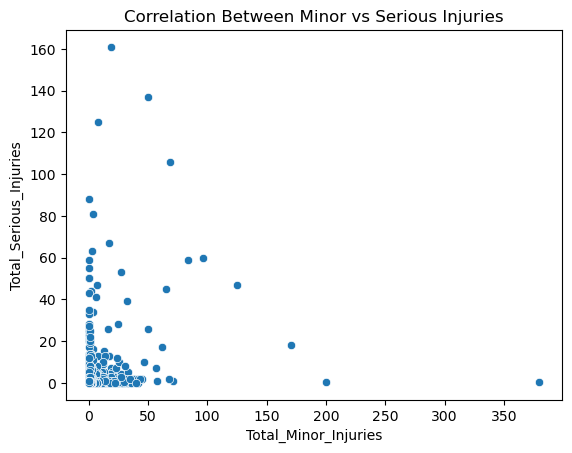

In [117]:
# Assessments of total minor injuries to total serious injuries
# The idea is to consier the correlation between injuries
sns.scatterplot(data=aviation, x='Total_Minor_Injuries', y='Total_Serious_Injuries')
plt.title('Correlation Between Minor vs Serious Injuries')
plt.show()

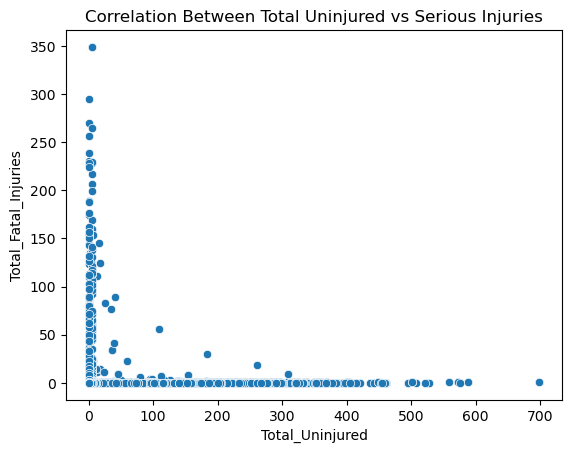

In [118]:
# Assessment of total minor injuries to total serious injuries
# The idea is to check for an inverse relationship
sns.scatterplot(data=aviation, x='Total_Uninjured', y='Total_Fatal_Injuries')
plt.title('Correlation Between Total Uninjured vs Serious Injuries')
plt.show()

In [119]:
# Time_Based Analysis of the Data

In [120]:
# Through feature engineering I will start off my making an year column
aviation['Event_Date']=pd.to_datetime(aviation['Event_Date'], errors='coerce')
aviation['Year'] =aviation['Event_Date'].dt.year

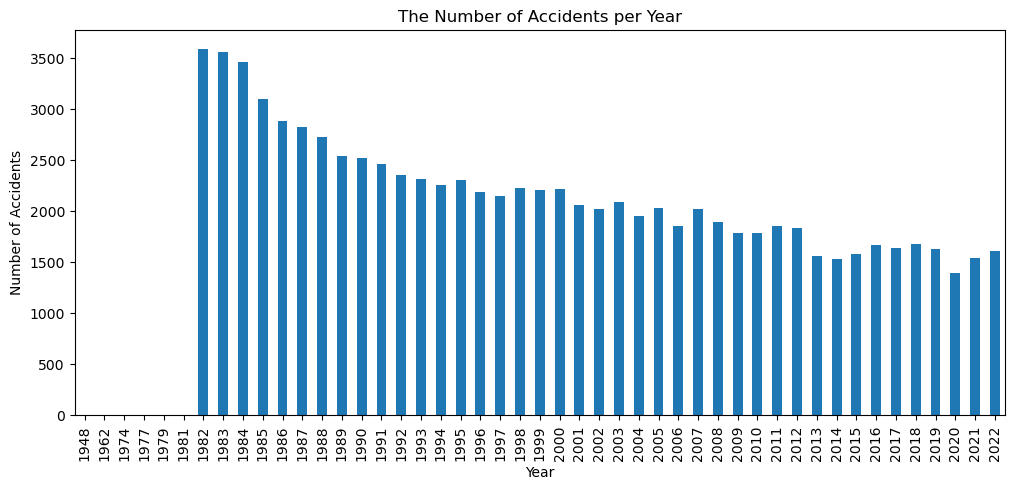

In [121]:
# Assessing accidents Per Year
aviation['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title('The Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

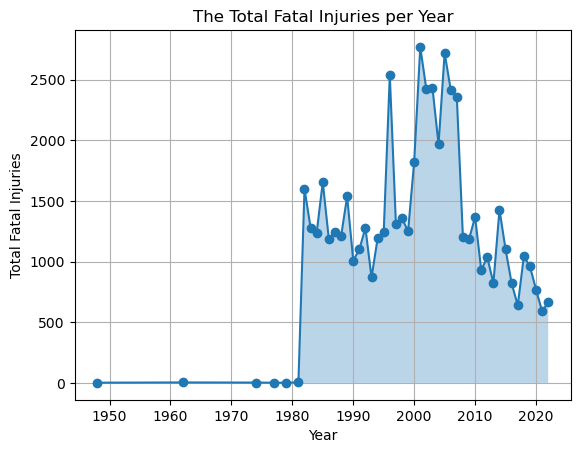

In [122]:
# An assessment of injuries over time
data = aviation.groupby('Year')['Total_Fatal_Injuries'].sum()
data.plot(kind='line', marker='o')
plt.fill_between(data.index, data.values, alpha=0.3)
plt.title('The Total Fatal Injuries per Year')
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [123]:
# A geographic Analysis to see the regions mostly affected if any

In [124]:
# Convert the Latitude and Longitude columns to numeric
aviation['Latitude'] = pd.to_numeric(aviation['Latitude'], errors='coerce')
aviation['Longitude'] = pd.to_numeric(aviation['Longitude'], errors='coerce')

In [125]:
aviation[['Latitude', 'Longitude']].isna().sum()

Latitude     76903
Longitude    76915
dtype: int64

In [126]:
aviation = aviation[(aviation['Latitude'] !=0) & (aviation['Longitude'] !=0)]

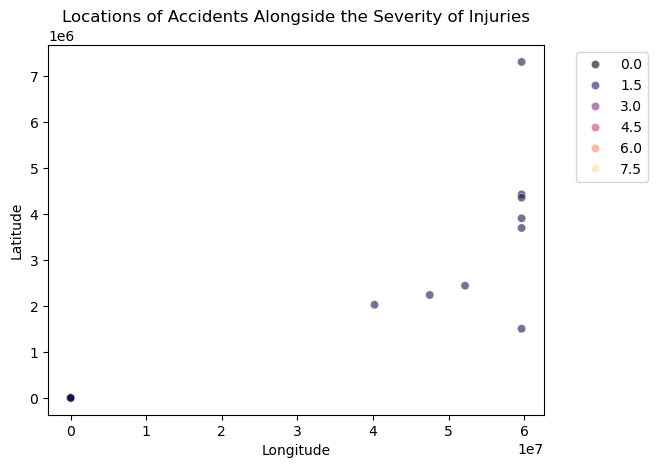

In [127]:
# A scatter plot map that shows accident locations
sns.scatterplot(data=aviation, x='Longitude', y='Latitude', hue='Injury_Severity', alpha=0.6, palette='magma')
plt.title('Locations of Accidents Alongside the Severity of Injuries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [128]:
# Multivariate Analysis
# The purpose for the analysis will be to assess how combined effects could lead to eaithe rinjury or severity such as 
# weather condition and flight phase and impact on sevevrity.


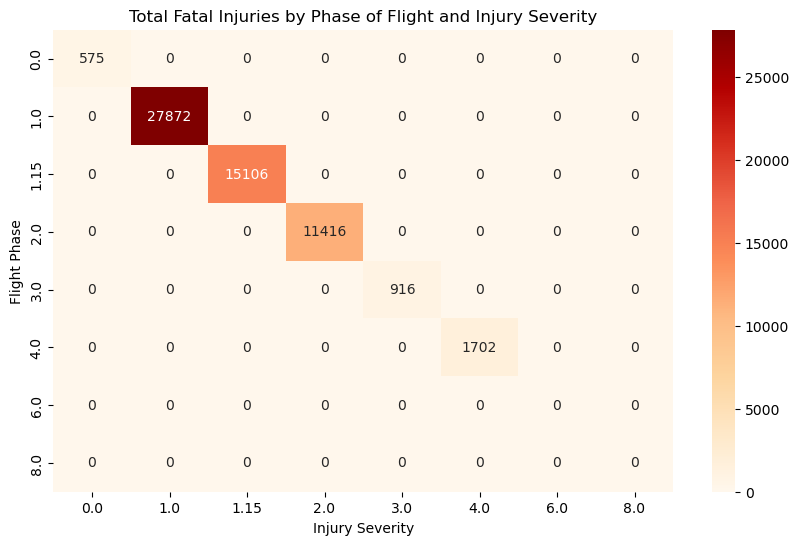

In [129]:
# I had an extremely difficult time with the multivarate analysis, had to settle on something simpler
# In this case a heatmap
pivot = aviation.pivot_table(
    index='Broad_Phase_Of_Flight',
    columns='Injury_Severity',
    values='Total_Fatal_Injuries',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='OrRd')
plt.title('Total Fatal Injuries by Phase of Flight and Injury Severity')
plt.ylabel('Flight Phase')
plt.xlabel('Injury Severity')
plt.show()

# I settled on this since I can explain it, the heatmap visualizes the total number of fatal injuries across various phases of flight, grouped by reported injury severity level. The rows show the different phases of the flight, which are takeoff, approach, and landing. The columns show the injury severity catatgeories, the cells, the sum of fatal injuries for each combination, and the color intensity shows teh darker areas being more saturated, and also the higher the total number of fatalities. The approach cell has teh darkest shading showing that the highest numbers of fatal injures happened during that phase compared to the others. 

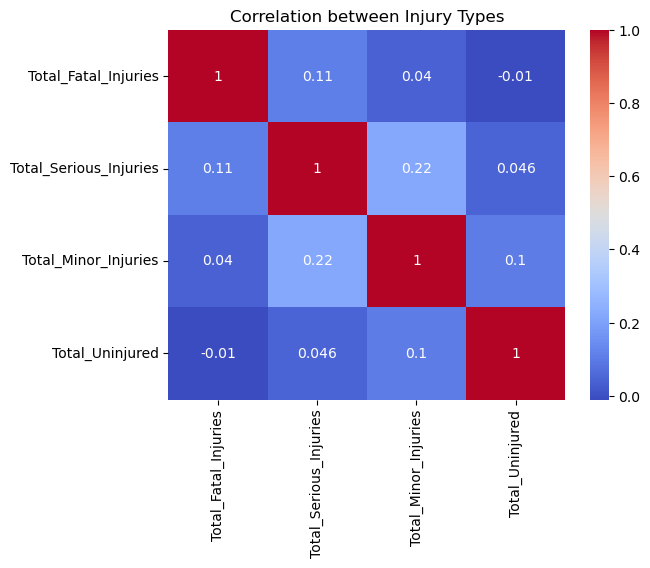

In [130]:
injury_cols = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
aviation[injury_cols] = aviation[injury_cols].apply(pd.to_numeric, errors='coerce')

sns.heatmap(aviation[injury_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Injury Types')
plt.show()